# Flat Resale

### Import the dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/Users/teresazhang/Documents/NTU/Y3S1/BC3409/Assignment/ResaleFlatPrice.csv")

### Check for null values

In [3]:
df.isnull().any()

month                  False
town                   False
flat_type              False
block                  False
street_name            False
storey_range           False
floor_area_sqm         False
flat_model             False
lease_commence_date    False
remaining_lease        False
resale_price           False
dtype: bool

In [4]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,22204.000000,22204.000000,2.220400e+04
mean,97.075545,1994.459827,4.320591e+05
std,24.356244,13.218726,1.539752e+05
min,31.000000,1966.000000,1.500000e+05
25%,77.000000,1984.000000,3.200000e+05
50%,94.000000,1994.000000,4.000000e+05
75%,112.000000,2004.000000,5.100000e+05
max,192.000000,2016.000000,1.205000e+06


### Data Visualisation

<AxesSubplot:>

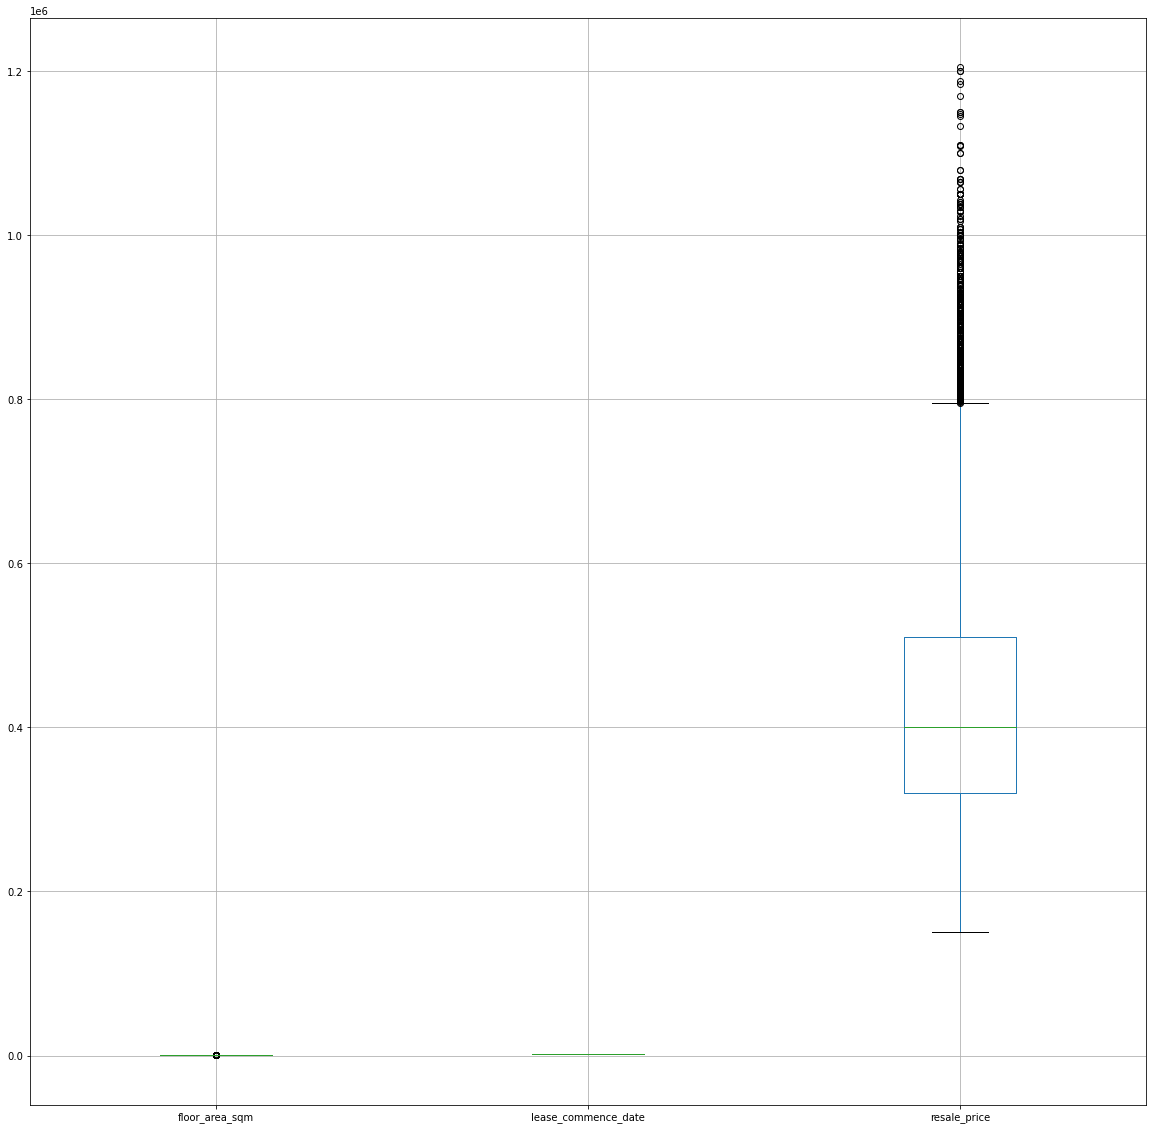

In [5]:
df.boxplot(figsize=(20,20))

array([[<AxesSubplot:title={'center':'floor_area_sqm'}>,
        <AxesSubplot:title={'center':'lease_commence_date'}>],
       [<AxesSubplot:title={'center':'resale_price'}>, <AxesSubplot:>]],
      dtype=object)

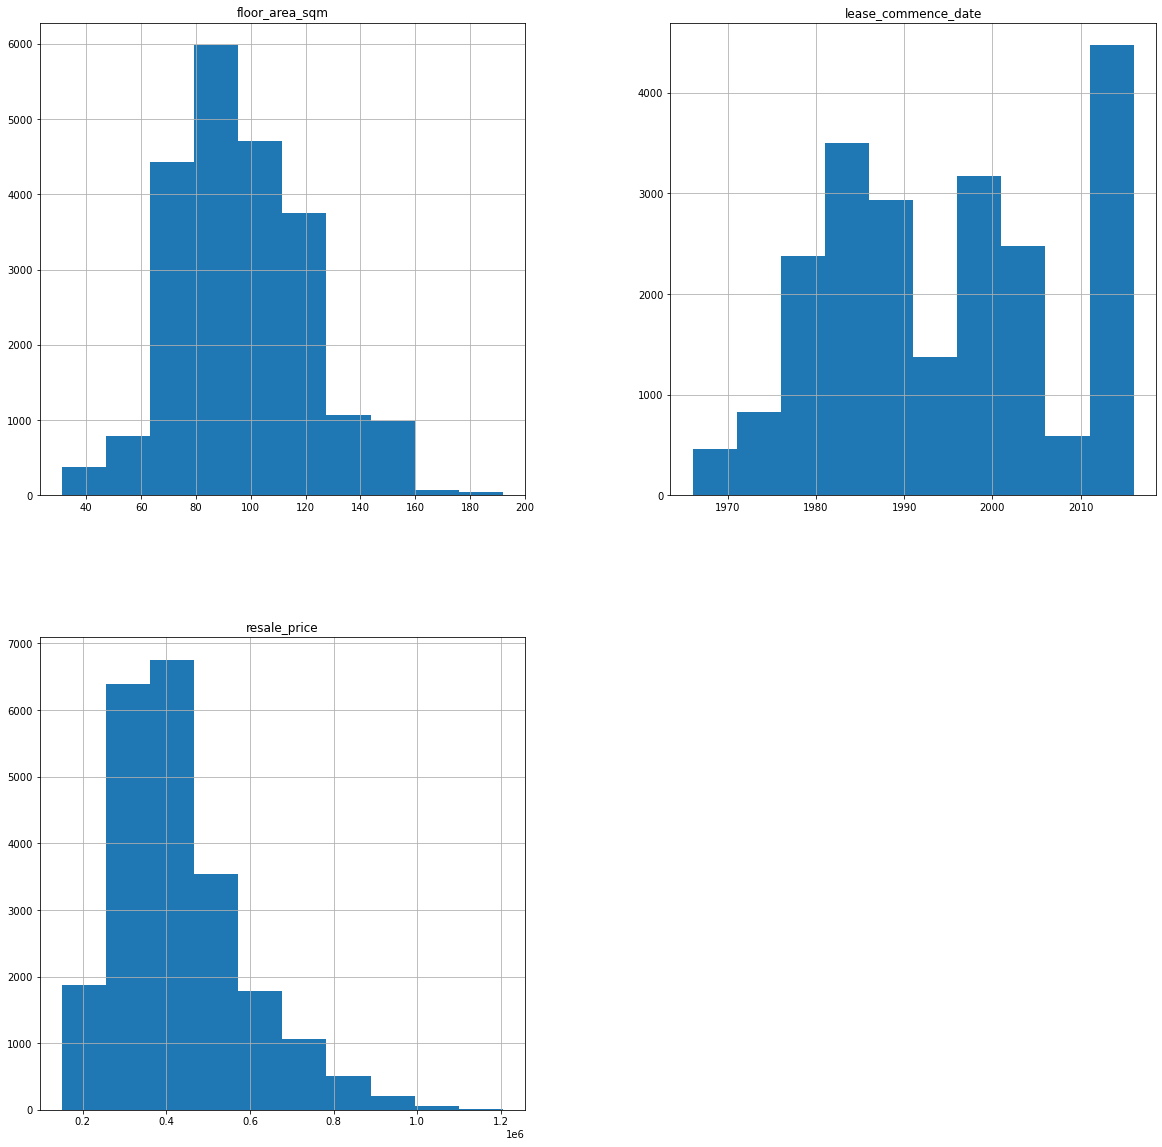

In [6]:
df.hist(figsize=(20,20))

In [7]:
import seaborn as sns

In [8]:
df.corr()

,floor_area_sqm,lease_commence_date,resale_price
floor_area_sqm,1.000000,0.145923,0.634752
lease_commence_date,0.145923,1.000000,0.315368
resale_price,0.634752,0.315368,1.000000


<AxesSubplot:>

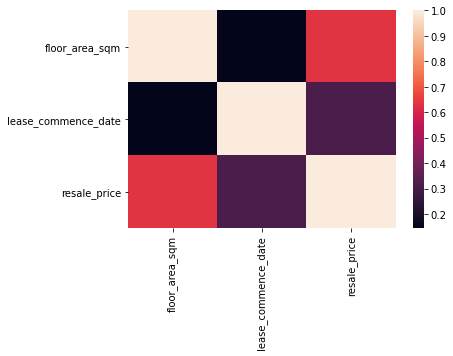

In [9]:
sns.heatmap(df.corr())

In [10]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Resale Price vs Floor Area')

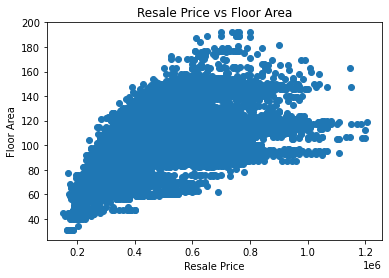

In [11]:
plt.scatter(df["resale_price"], df["floor_area_sqm"])
plt.xlabel("Resale Price")
plt.ylabel("Floor Area")
plt.title("Resale Price vs Floor Area")

Text(0.5, 1.0, 'Resale Price vs Lease Commence Date')

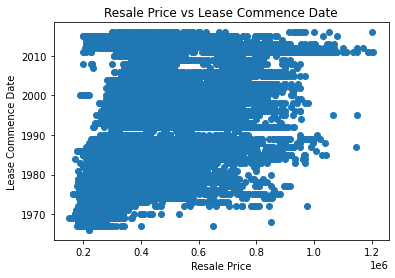

In [12]:
plt.scatter(df["resale_price"], df["lease_commence_date"])
plt.xlabel("Resale Price")
plt.ylabel("Lease Commence Date")
plt.title("Resale Price vs Lease Commence Date")

### Use the attributes decided for X

In [13]:
df_drop = df[["resale_price","town", "flat_type", "floor_area_sqm", "flat_model", "lease_commence_date"]]

In [14]:
df_drop

,resale_price,town,flat_type,floor_area_sqm,flat_model,lease_commence_date
0,270000.0,ANG MO KIO,3 ROOM,68.0,New Generation,1981
1,295000.0,ANG MO KIO,3 ROOM,73.0,New Generation,1976
2,270000.0,ANG MO KIO,3 ROOM,67.0,New Generation,1978
3,230000.0,ANG MO KIO,3 ROOM,67.0,New Generation,1978
4,262500.0,ANG MO KIO,3 ROOM,68.0,New Generation,1981
...,...,...,...,...,...,...
22199,580000.0,YISHUN,EXECUTIVE,142.0,Apartment,1988
22200,565000.0,YISHUN,EXECUTIVE,146.0,Maisonette,1988
22201,633000.0,YISHUN,EXECUTIVE,164.0,Apartment,1992
22202,788888.0,YISHUN,EXECUTIVE,164.0,Apartment,1992


### Creating dummy variables on categorical input

In [15]:
df_dc = pd.get_dummies(df_drop, columns=['town', 'flat_type', 'flat_model'])

### Normalize floor_area_sqm using zscore

In [16]:
from scipy import stats

In [17]:
df_dc["floor_area_sqm"] = stats.zscore(df["floor_area_sqm"] )

### Split into train test

In [18]:
X = df_dc.drop(columns=["resale_price"])
Y = df_dc["resale_price"]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1)

## Machine Learning

### Linear Regression

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [22]:
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [23]:
pred = model.predict(X_test)
pred

array([417996.57479733, 368909.22684785, 306819.97027265, ...,
       367756.95397033, 515145.14965147, 725937.87754341])

In [24]:
print("RMSE for linear regression:", mean_squared_error(Y_test,pred)**0.5)

RMSE for linear regression: 62455.43131423416


### Model Analysis

#### VIF - Check Collinearity

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]
  
print(vif_data)

/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                              feature        VIF
0                      floor_area_sqm  22.867916
1                 lease_commence_date   3.304360
2                     town_ANG MO KIO        inf
3                          town_BEDOK        inf
4                         town_BISHAN        inf
5                    town_BUKIT BATOK        inf
6                    town_BUKIT MERAH        inf
7                  town_BUKIT PANJANG        inf
8                    town_BUKIT TIMAH        inf
9                   town_CENTRAL AREA        inf
10                 town_CHOA CHU KANG        inf
11                      town_CLEMENTI        inf
12                       town_GEYLANG        inf
13                       town_HOUGANG        inf
14                   town_JURONG EAST        inf
15                   town_JURONG WEST        inf
16               town_KALLANG/WHAMPOA        inf
17                 town_MARINE PARADE        inf
18                     town_PASIR RIS        inf
19                  

#### QQ plot - Check Heteroskedasticity

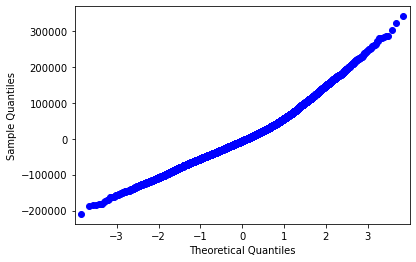

In [27]:
import statsmodels.api as sm 
from matplotlib import pyplot as plt
mod_fit = sm.OLS(Y_train, X_train).fit()
res = mod_fit.resid
fig = sm.qqplot(res)
plt.show()

The graph is slightly skewed to the right, suggesting that the errors do not that a constant variance

#### Anova - Check Significant

In [28]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols("Y~X", df_dc).fit()
print(model.summary())
anova_results = anova_lm(model)
print("\nANOVA results")
print(anova_results)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     2346.
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:12:39   Log-Likelihood:            -2.7630e+05
No. Observations:               22204   AIC:                         5.527e+05
Df Residuals:                   22153   BIC:                         5.531e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.129e+06   9.09e+04    -89.399      0.0

### Decision Tree

In [29]:
from sklearn import tree
model = tree.DecisionTreeRegressor(random_state=1)

In [30]:
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print("RMSE for decision tree:",mean_squared_error(Y_test,pred)**0.5)

RMSE for decision tree: 43711.16010257397


### Model Analysis

#### Feature Ranking

Feature: 0, Score: 0.40460
Feature: 1, Score: 0.14853
Feature: 2, Score: 0.00667
Feature: 3, Score: 0.00309
Feature: 4, Score: 0.03037
Feature: 5, Score: 0.00570
Feature: 6, Score: 0.05190
Feature: 7, Score: 0.00264
Feature: 8, Score: 0.00853
Feature: 9, Score: 0.01991
Feature: 10, Score: 0.00630
Feature: 11, Score: 0.00999
Feature: 12, Score: 0.00823
Feature: 13, Score: 0.00149
Feature: 14, Score: 0.00211
Feature: 15, Score: 0.00781
Feature: 16, Score: 0.01668
Feature: 17, Score: 0.00610
Feature: 18, Score: 0.00297
Feature: 19, Score: 0.00208
Feature: 20, Score: 0.04124
Feature: 21, Score: 0.00709
Feature: 22, Score: 0.01140
Feature: 23, Score: 0.00365
Feature: 24, Score: 0.00608
Feature: 25, Score: 0.01138
Feature: 26, Score: 0.01524
Feature: 27, Score: 0.00657
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00682
Feature: 30, Score: 0.00048
Feature: 31, Score: 0.09642
Feature: 32, Score: 0.00390
Feature: 33, Score: 0.00006
Feature: 34, Score: 0.00001
Feature: 35, Score: 0.00029
Fe

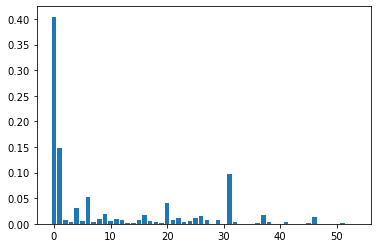

In [31]:
from matplotlib import pyplot
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#### Plot Tree

[Text(0.4745844454487736, 0.9886363636363636, 'X[0] <= -0.516\nsquared_error = 23569257722.566\nsamples = 16653\nvalue = 431615.454'),
 Text(0.1858059138077421, 0.9659090909090909, 'X[0] <= -0.927\nsquared_error = 5896297542.995\nsamples = 4955\nvalue = 301346.824'),
 Text(0.13821109557530636, 0.9431818181818182, 'X[1] <= 2001.0\nsquared_error = 4484914417.716\nsamples = 4055\nvalue = 289104.63'),
 Text(0.10567691933836074, 0.9204545454545454, 'X[9] <= 0.5\nsquared_error = 2410993207.961\nsamples = 3129\nvalue = 274584.34'),
 Text(0.06939971976737665, 0.8977272727272727, 'X[0] <= -1.625\nsquared_error = 2086170051.531\nsamples = 3069\nvalue = 272278.397'),
 Text(0.010023400378084711, 0.875, 'X[0] <= -1.83\nsquared_error = 878475669.536\nsamples = 200\nvalue = 213276.38'),
 Text(0.004909242638418175, 0.8522727272727273, 'X[0] <= -2.651\nsquared_error = 366037098.18\nsamples = 123\nvalue = 200966.569'),
 Text(0.004630209309058705, 0.8295454545454546, 'squared_error = 48987654.321\nsample

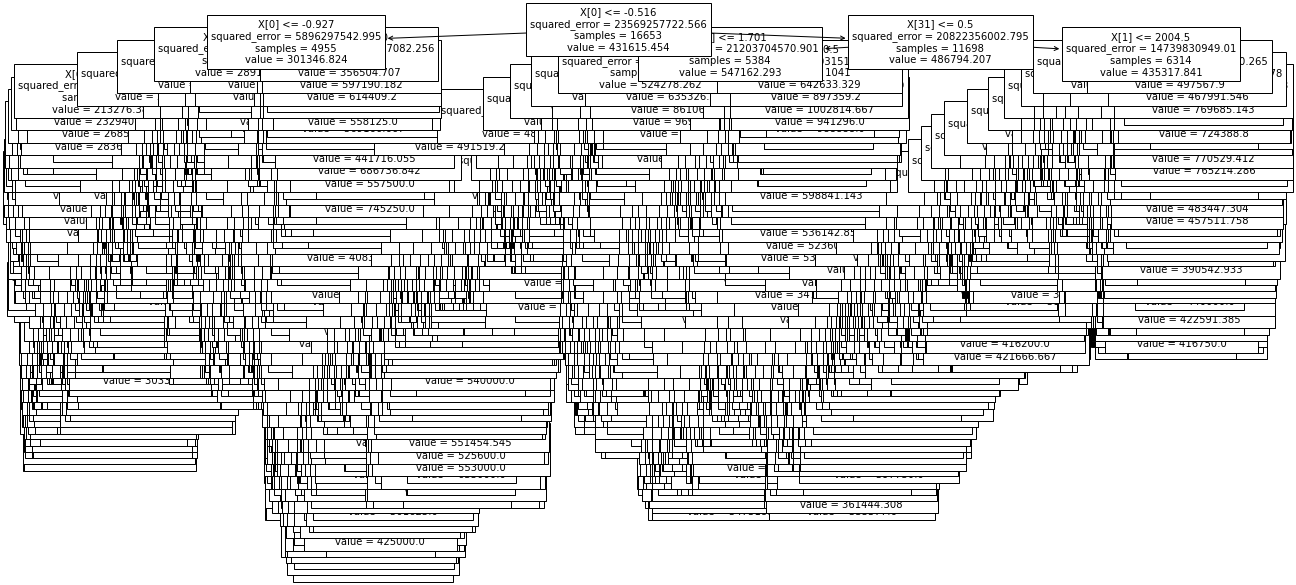

In [32]:
plt.subplots(figsize=(20, 10))
tree.plot_tree(model, fontsize=10)

#### CP optimum

In [34]:
path = model.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas, impurities)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.08386555e+08
 2.18290293e+09 7.18806065e+09] [8.10650349e+08 8.10650349e+08 8.10650349e+08 ... 1.41982941e+10
 1.63811971e+10 2.35692577e+10]


### Random Forest

In [36]:
from sklearn import ensemble
model = ensemble.RandomForestRegressor(random_state=1)

In [37]:
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print("RMSE for random forest:",mean_squared_error(Y_test,pred)**0.5)

RMSE for random forest: 40131.48387287037


### Gradient Boosting

In [38]:
model = ensemble.GradientBoostingRegressor(random_state=1)

In [39]:
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print("RMSE for gradient boosting:",mean_squared_error(Y_test,pred)**0.5)

RMSE for gradient boosting: 62325.73754141881


### Neural Network

In [40]:
from sklearn import neural_network
model = neural_network.MLPRegressor(random_state=1)

In [41]:
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print("RMSE for neural network:",mean_squared_error(Y_test,pred)**0.5)

RMSE for neural network: 151107.6835284498


/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Keras

In [42]:
import random
random.seed(1)

import numpy
numpy.random.seed(1)

import tensorflow as tf
tf.random.set_seed(1)

from keras.models import Sequential
from keras.layers import Dense,Dropout

In [43]:
model = Sequential()

In [44]:
model.add(Dense(37,input_dim=54,activation='relu'))
model.add(Dropout(0.1))

In [45]:
model.add(Dense(37,activation='relu'))
model.add(Dropout(0.1))

In [46]:
model.add(Dense(1,activation="linear"))

In [47]:
model.compile(loss="mse",optimizer="adam",metrics=["mse"])

In [48]:
b = 5
h = model.fit(X_train,Y_train,batch_size=b,epochs=100)

Epoch 1/100
3331/3331 [==============================] - 4s 1ms/step - loss: 43411734528.0000 - mse: 43411734528.0000
Epoch 2/100
3331/3331 [==============================] - 4s 1ms/step - loss: 25170642944.0000 - mse: 25170642944.0000
Epoch 3/100
3331/3331 [==============================] - 4s 1ms/step - loss: 24834492416.0000 - mse: 24834492416.0000
Epoch 4/100
3331/3331 [==============================] - 4s 1ms/step - loss: 24995911680.0000 - mse: 24995911680.0000
Epoch 5/100
3331/3331 [==============================] - 4s 1ms/step - loss: 24598968320.0000 - mse: 24598968320.0000
Epoch 6/100
3331/3331 [==============================] - 4s 1ms/step - loss: 24562176000.0000 - mse: 24562176000.0000
Epoch 7/100
3331/3331 [==============================] - 4s 1ms/step - loss: 23958732800.0000 - mse: 23958732800.0000
Epoch 8/100
3331/3331 [==============================] - 4s 1ms/step - loss: 23440510976.0000 - mse: 23440510976.0000
Epoch 9/100
3331/3331 [==============================] -

3331/3331 [==============================] - 3s 1ms/step - loss: 7283713024.0000 - mse: 7283713024.0000
Epoch 71/100
3331/3331 [==============================] - 4s 1ms/step - loss: 7076850176.0000 - mse: 7076850176.0000
Epoch 72/100
3331/3331 [==============================] - 4s 1ms/step - loss: 7338189312.0000 - mse: 7338189312.0000
Epoch 73/100
3331/3331 [==============================] - 4s 1ms/step - loss: 7195363328.0000 - mse: 7195363328.0000
Epoch 74/100
3331/3331 [==============================] - 4s 1ms/step - loss: 7178150400.0000 - mse: 7178150400.0000
Epoch 75/100
3331/3331 [==============================] - 4s 1ms/step - loss: 7193881088.0000 - mse: 7193881088.0000
Epoch 76/100
3331/3331 [==============================] - 4s 1ms/step - loss: 7095204864.0000 - mse: 7095204864.0000
Epoch 77/100
3331/3331 [==============================] - 4s 1ms/step - loss: 7210835456.0000 - mse: 7210835456.0000
Epoch 78/100
3331/3331 [==============================] - 4s 1ms/step - loss:

In [49]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'MSE')

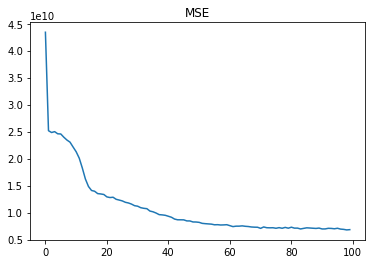

In [50]:
plt.plot(h.history["mse"])
plt.title("MSE")

Text(0.5, 1.0, 'Loss')

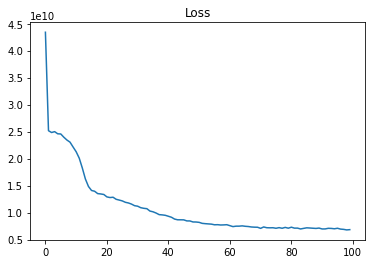

In [51]:
plt.plot(h.history["loss"])
plt.title("Loss")

In [52]:
pred = model.predict(X_test)
print("RMSE for keras:",mean_squared_error(Y_test,pred)**0.5)

174/174 [==============================] - 0s 843us/step
RMSE for keras: 70223.95412607536


#### Using different optimizer for Keras

In [81]:
model = Sequential()

In [82]:
model.add(Dense(37,input_dim=54,activation='relu'))
model.add(Dropout(0.1))

In [83]:
model.add(Dense(37,activation='relu'))
model.add(Dropout(0.1))

In [84]:
model.add(Dense(1,activation="linear"))

In [85]:
model.compile(loss="mse",optimizer="RMSprop",metrics=["mse"])

In [86]:
b = 5
h = model.fit(X_train,Y_train,batch_size=b,epochs=100)

Epoch 1/100
3331/3331 [==============================] - 5s 1ms/step - loss: 49133408256.0000 - mse: 49133408256.0000
Epoch 2/100
3331/3331 [==============================] - 4s 1ms/step - loss: 25050343424.0000 - mse: 25050343424.0000
Epoch 3/100
3331/3331 [==============================] - 4s 1ms/step - loss: 24726591488.0000 - mse: 24726591488.0000
Epoch 4/100
3331/3331 [==============================] - 4s 1ms/step - loss: 24786726912.0000 - mse: 24786726912.0000
Epoch 5/100
3331/3331 [==============================] - 4s 1ms/step - loss: 24286586880.0000 - mse: 24286586880.0000
Epoch 6/100
3331/3331 [==============================] - 4s 1ms/step - loss: 24302082048.0000 - mse: 24302082048.0000
Epoch 7/100
3331/3331 [==============================] - 4s 1ms/step - loss: 23636447232.0000 - mse: 23636447232.0000
Epoch 8/100
3331/3331 [==============================] - 5s 1ms/step - loss: 23272570880.0000 - mse: 23272568832.0000
Epoch 9/100
3331/3331 [==============================] -

3331/3331 [==============================] - 4s 1ms/step - loss: 7227465728.0000 - mse: 7227465728.0000
Epoch 71/100
3331/3331 [==============================] - 4s 1ms/step - loss: 7102050816.0000 - mse: 7102050816.0000
Epoch 72/100
3331/3331 [==============================] - 5s 1ms/step - loss: 7256566272.0000 - mse: 7256565760.0000
Epoch 73/100
3331/3331 [==============================] - 4s 1ms/step - loss: 7183934976.0000 - mse: 7183934976.0000
Epoch 74/100
3331/3331 [==============================] - 4s 1ms/step - loss: 6992711168.0000 - mse: 6992711168.0000
Epoch 75/100
3331/3331 [==============================] - 4s 1ms/step - loss: 7124282880.0000 - mse: 7124283392.0000
Epoch 76/100
3331/3331 [==============================] - 3s 1ms/step - loss: 6985334784.0000 - mse: 6985334784.0000
Epoch 77/100
3331/3331 [==============================] - 4s 1ms/step - loss: 7012997120.0000 - mse: 7012997120.0000
Epoch 78/100
3331/3331 [==============================] - 4s 1ms/step - loss:

In [87]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'MSE')

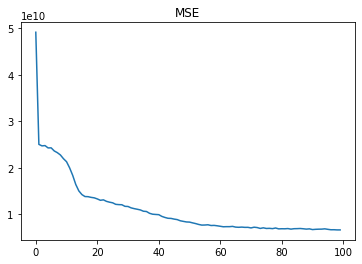

In [88]:
plt.plot(h.history["mse"])
plt.title("MSE")

Text(0.5, 1.0, 'Loss')

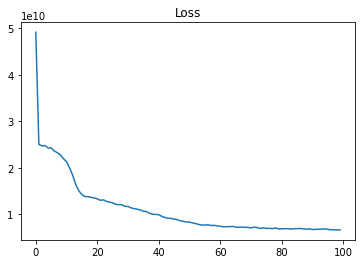

In [89]:
plt.plot(h.history["loss"])
plt.title("Loss")

In [90]:
pred = model.predict(X_test)
print("RMSE for keras:",mean_squared_error(Y_test,pred)**0.5)

174/174 [==============================] - 0s 951us/step
RMSE for keras: 71512.49009808284


#### RMSE increased slightly suggesting that adam is still a better optimizer.

## Improving accuracy

### Feature selection (instead of the 5 variables chosen)

In [91]:
from sklearn.feature_selection import f_regression, SelectKBest

In [92]:
#i = 0
#j = 0
#for i in range(42909):
#    a = df.remaining_lease.str.extractall('(\d+)')[0].iloc[i]
#    if df.remaining_lease.str.extractall('(\d+)').index[i][0]!=df.remaining_lease.str.extractall('(\d+)').index[i+1][0]:
#        i += 1
#        b = df.remaining_lease.str.extractall('(\d+)')[0].iloc[i]
#    else:
#        b = 0
#    df['remaining_lease'][j] = a+b/12
#    j += 1
df['remaining_lease']=df.remaining_lease.str.extract('(\d+)')

In [93]:
df_dc = pd.get_dummies(df, columns=['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model'])

In [94]:
X = df_dc.drop(columns="resale_price")
Y = df_dc["resale_price"]

In [95]:
f = SelectKBest(score_func=f_regression,k=10).fit(X,Y)

In [96]:
f = f.get_support()

In [97]:
f

array([ True,  True,  True, ..., False, False, False])

In [98]:
X.columns[f]

Index(['floor_area_sqm', 'lease_commence_date', 'remaining_lease',
       'flat_type_3 ROOM', 'flat_type_5 ROOM', 'flat_type_EXECUTIVE',
       'flat_model_Apartment', 'flat_model_DBSS', 'flat_model_Maisonette',
       'flat_model_New Generation'],
      dtype='object')

#### Using floor_area_sqm, lease_commence_date, remaining_lease, flat_type, and flat_model as the new chosen variables

In [99]:
df_drop = df[["resale_price", "flat_type", "floor_area_sqm", "flat_model", "lease_commence_date", "remaining_lease"]]

In [100]:
df_dc = pd.get_dummies(df_drop, columns=['flat_type', 'flat_model'])

In [101]:
from scipy import stats

In [102]:
df_dc["floor_area_sqm"] = stats.zscore(df["floor_area_sqm"] )

In [103]:
X = df_dc.drop(columns=["resale_price"])
Y = df_dc["resale_price"]

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1)

## Machine Learning using Feature Selection

### Linear Regression

In [106]:
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [107]:
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [108]:
pred = model.predict(X_test)
pred

array([430497.59574487, 354299.17499464, 427619.78205075, ...,
       431093.76521684, 384819.19908702, 560622.86959945])

In [109]:
print("RMSE for linear regression:", mean_squared_error(Y_test,pred)**0.5)

RMSE for linear regression: 105358.28633884124


### Neural Network

In [110]:
from sklearn import neural_network
model = neural_network.MLPRegressor(random_state=1)

In [111]:
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print("RMSE for neural network:",mean_squared_error(Y_test,pred)**0.5)

RMSE for neural network: 147733.01598634326


/Users/teresazhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### The RMSE for linear regression increased significantly and the RMSE for neural network decreased slightly, suggesting that the orginal five attributes/features used were better for linear regression but feature selection works better for neural network.

## Machine Learning models that do not require feature selection

In [112]:
df_dc = pd.get_dummies(df, columns=['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model'])

In [113]:
X = df_dc.drop(columns="resale_price")
Y = df_dc["resale_price"]

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1)

### Decision Tree

In [116]:
from sklearn import tree
model = tree.DecisionTreeRegressor(random_state=1)

In [117]:
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print("RMSE for decision tree:",mean_squared_error(Y_test,pred)**0.5)

RMSE for decision tree: 44126.51580474205


### Random Forest

In [118]:
from sklearn import ensemble
model = ensemble.RandomForestRegressor(random_state=1)

In [119]:
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print("RMSE for random forest:",mean_squared_error(Y_test,pred)**0.5)

RMSE for random forest: 33798.87342042434


### Gradient Boosting

In [120]:
model = ensemble.GradientBoostingRegressor(random_state=1)

In [121]:
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print("RMSE for gradient boosting:",mean_squared_error(Y_test,pred)**0.5)

RMSE for gradient boosting: 60580.911362109255


#### Feature selection is not important for these machine learning models as they have their own internal feature selection. When using all the X variables, the time for training the model significantly increased. Both the RMSE for decision tree and random forest did not change much, while the RMSE for gradient boosting significantly increased.

## Pros and Cons for each model

### Linear Regression

#### Pros
Linear regression performs exceptionally well for linearly separable data. Easier to implement, interpret and efficient to train. It handles overfitting pretty well using dimensionally reduction techniques, regularization, and cross-validation.

#### Cons
There is an assumption of linearity between dependent and independent variables, independence between attributes, normal distribution of the error, and constant standard deviation. It is often sensitive to outliers, prone to noise, overfitting, and multicollinearity.

#### How to overcome the weaknesses
Can use different shape of regression, e.g. Quantile Regression. Since the errors for linear regression do not have a constant variance as shown by the Q-Q plot, it helps by separating the data using quantiles so the non-constant variance does not matter.
Using MARS will help to counter the assumption of linearity between dependent and independent variables. 
Could use backward elimination with AIC to choose variables instead of feature selection.

### Decision Tree

#### Pros
If there is a high non-linearity and complec relationship between dependent & independent variables, a tree model will outperform a classical regression method. To build a model which is easy to explain to people, a decision tree model will always do better than a linear model.
Decision trees generate understandable rules, they are capable of handline both continuous and categorical variables and provide a clear indication of which fields are nost important for prediction or classification.

#### Cons
When there are large number of features with less datasets, linear regressions may outperform decision trees. It is less appropriate for a continuous attribute. The process of growing a decision tree is computationally expensive. At each node, each candidate splitting field must be sorted before its split can be found. And there is a problem with overfitting.

#### How to overcome the weaknesses
Prune the tree so that there is no overfitting. Use random forest or gradient boosting for better accuracy.

### Random Forest

#### Pros
Robust to outliers.
Works well with non-linear data.
Lower risk of overfitting.
Runs efficiently on a large dataset.
Better accuracy than other classification algorithms. Bootstrap Aggregation (Bagging) is a general procedure that can be used to reduce the variance for those algorithm that have high variance.

#### Cons
Random forests are found to be biased while dealing with categorical variables. It is slow in training a model. It is not suitable for linear methods with a lot of sparse features.

#### How to overcome the weaknesses
Use less variables (those that are not important) to make training faster

### Gradient Boosting

Gradient boosting trees can be more accurate than random forests. Because we train them to correct each other’s errors, they’re capable of capturing complex patterns in the data. However, if the data are noisy, the boosted trees may overfit and start modeling the noise.

#### Pros
Lots of flexibility - can optimize on different loss functions and provides several hyper parameter tuning options that make the function fit very flexible.
No data pre-processing required - often works great with categorical and numerical values as is.
Handles missing data - imputation not required.

#### Cons
Gradient Boosting Models will continue improving to minimize all errors. This can overemphasize outliers and cause overfitting.
Computationally expensive - often require many trees (>1000) which can be time and memory exhaustive.
The high flexibility results in many parameters that interact and influence heavily the behavior of the approach (number of iterations, tree depth, regularization parameters, etc.). This requires a large grid search during tuning.
Less interpretative in nature, although this is easily addressed with various tools.

#### How to overcome the weaknesses
Use less variables (those that are not important) to make training faster

### Neural Network

#### Pros
Neural Network uses entropy instead of gini coefficient to compute errors, which mimics human nature. It results in very low predictive error (on trainset!). It can capture complex relationships by increasing number of hidden nodes and/or hidden layers. There is no need to specify a relationship between Y and Xs for neural networks. Neural networks are good to model with nonlinear data with large number of inputs; for example, images. It is reliable in an approach of tasks involving many features. It works by splitting the problem of classification into a layered network of simpler elements.
Once trained, the predictions are pretty fast.
Neural networks can be trained with any number of inputs and layers.

#### Cons
Neural networks are black boxes, meaning we cannot know how much each independent variable is influencing the dependent variables.
It is computationally very expensive and time consuming to train with traditional CPUs.
Neural networks depend a lot on training data. This leads to the problem of over-fitting and generalization. The mode relies more on the training data and may be tuned to the data.

#### How to overcome the weaknesses
Deep neural networks are prone to overfitting because they learn millions or billions of parameters while building the model. A model having this many parameters can overfit the training data because it has sufficient capacity to do so.

The basic idea to deal with the problem of overfitting is to decrease the complexity of the model. To do so, we can make the network smaller by simply removing the layers or reducing the number of neurons, etc.

### Importance of model to bank

Random Forest performed the best with the smallest RMSE of 40131.48387287037 even after various improvements made to the other models. The model can improve without eliminating features or doing feature selection as it has its own feature selection already, and having more data points can result in a more accurate model for random forest (even though the training time will take longer). The bank can plot out the tree to see which variables are more important, so they can put in more care into researching these variables when deciding the flat resale price.